<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml06_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÎÜçÏñ¥(Perch) Î¨¥Í≤å ÏòàÏ∏°

* ÎÜçÏñ¥Ïùò Î™®Îì† ÌäπÏÑ±Îì§ÏùÑ ÏÇ¨Ïö©Ìïú Î¨¥Í≤å ÏòàÏ∏°
* KNN Regressor vs Linear Regression ÎπÑÍµê
* Îã§Ìï≠ ÌöåÍ∑Ä
* Í∑úÏ†ú(Regularization)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.tail()

Species  Weight  Length  Diagonal  Height   Width
154   Smelt    12.2    12.2      13.4  2.0904  1.3936
155   Smelt    13.4    12.4      13.5  2.4300  1.2690
156   Smelt    12.2    13.0      13.8  2.2770  1.2558
157   Smelt    19.7    14.3      15.2  2.8728  2.0672
158   Smelt    19.9    15.0      16.2  2.9322  1.8792

In [5]:
perch = fish[fish.Species == 'Perch']   # Perch(ÎÜçÏñ¥) Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

In [6]:
perch.head()

Species  Weight  Length  Diagonal  Height   Width
72   Perch     5.9     8.4       8.8  2.1120  1.4080
73   Perch    32.0    13.7      14.7  3.5280  1.9992
74   Perch    40.0    15.0      16.0  3.8240  2.4320
75   Perch    51.5    16.2      17.2  4.5924  2.6316
76   Perch    70.0    17.4      18.5  4.5880  2.9415

Weight ~ Length + Diagonal + Height + Width

In [7]:
perch.columns[2:]
# X = perch[['Length', 'Diagonal', 'Height', 'Width']].values
X = perch[perch.columns[2:]].values     # ÌäπÏÑ±(features) Î∞∞Ïó¥

In [8]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [9]:
y = perch['Weight'].values  # ÌÉÄÍ≤ü(target) Î∞∞Ïó¥

In [10]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# ÌõàÎ†® ÏÖã/ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(42, 4)

In [13]:
X_test.shape

(14, 4)

In [14]:
y_train.shape

(42,)

In [15]:
y_test.shape

(14,)

# 1Ï∞®Ìï≠Îßå Í≥†Î†§Ìïú ÌöåÍ∑Ä

## KNN

In [16]:
knn = KNeighborsRegressor() # ML Model Create

In [17]:
knn.fit(X_train, y_train)   # model training

KNeighborsRegressor()

In [18]:
train_pred = knn.predict(X_train)   # X_trainÏùò ÏòàÏ∏°Í∞í  Ï∞æÍ∏∞

In [19]:
train_pred[:5]  # 5Í∞úÎßå Ï∂úÎ†•

array([ 87.6, 123. ,  79.6,  70.6, 723. ])

In [20]:
y_train[:5] # Ïã§Ï†úÍ∞í 5Í∞ú Ï∂úÎ†•, (ÎÜçÏñ¥Ïùò Î¨¥Í≤å)

array([ 85., 135.,  78.,  70., 700.])

In [21]:
test_pred = knn.predict(X_test)     # ÌÖåÏä§Ìä∏ ÏÖã ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞

In [22]:
test_pred[:5]

array([ 60. ,  79.6, 248. , 122. , 130. ])

In [23]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [24]:
print('ÌõàÎ†® ÏÖã MSE:', mean_squared_error(y_train, train_pred))
print('ÌõàÎ†® ÏÖã R2:', r2_score(y_train, train_pred))
print('ÌÖåÏä§Ìä∏ ÏÖã MSE:', mean_squared_error(y_test, test_pred))
print('ÌÖåÏä§Ìä∏ ÏÖã R2:', r2_score(y_test, test_pred))

ÌõàÎ†® ÏÖã MSE: 2986.5723809523806
ÌõàÎ†® ÏÖã R2: 0.97579760182756
ÌÖåÏä§Ìä∏ ÏÖã MSE: 837.3100000000001
ÌÖåÏä§Ìä∏ ÏÖã R2: 0.9916579819676246


KNN Î™®Îç∏ÏùÄ Í≥ºÏÜåÏ†ÅÌï©.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

ÏÑ†ÌòïÌöåÍ∑ÄÏãùÏóêÏÑú ÏòàÏ∏°Ìïú Í∞í $\hat{y}$Îì§Ïùò MSEÍ∞Ä ÏµúÏÜåÍ∞Ä ÎêòÎäî $w_0$ ~ $w_4$Î•º Ï∞æÎäî Í≥ºÏ†ï.

In [25]:
lin_reg = LinearRegression()    # ML Model Create

In [26]:
lin_reg.fit(X_train, y_train)   # ML training

LinearRegression()

In [27]:
lin_reg.coef_       # Í∏∞Ïö∏Í∏∞ Í∞í. Í≤∞Ï†ïÍ≥ÑÏàò

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [28]:
lin_reg.intercept_  #

np.float64(-610.0275364260515)

Î¨¥Í≤å = -610 -40 x Length + 47 x Diagnoal + 67 x Height + 35 x Width

In [29]:
train_pred = lin_reg.predict(X_train)   # ÌõàÎ†® ÏÖã ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞

In [30]:
test_pred = lin_reg.predict(X_test) # ÌÖåÏä§Ìä∏ ÏÖã ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞

In [31]:
print('ÌõàÎ†® ÏÖã R2:', r2_score(y_train, train_pred))
print('ÌÖåÏä§Ìä∏ ÏÖã R2:', r2_score(y_test, test_pred))

ÌõàÎ†® ÏÖã R2: 0.9567246116638569
ÌÖåÏä§Ìä∏ ÏÖã R2: 0.8790465615990273


Linear RegressionÏùÄ Í≥ºÎåÄÏ†ÅÌï©.

Linear RegressionÏùÄ KNNÎ≥¥Îã§ Ïò§Ï∞®Í∞Ä ÌÅ¨Îã§. (ÏÑ±Îä•Ïù¥ Ïïà Ï¢ãÎã§.)

# 2Ï∞®Ìï≠ÏùÑ Í≥†Î†§Ìïú ÌöåÍ∑Ä

## KNN

In [32]:
poly = PolynomialFeatures(include_bias=False)   # Î≥ÄÌôòÍ∏∞
# degree=2(Í∏∞Î≥∏Í∞í) : 2Ï∞®Ìï≠ÍπåÏßÄ Í≥†Î†§
# interaction_only=False(Í∏∞Î≥∏Í∞í) : x1^2, ... x4^2, x1 * x2, x1 * x3, ... Î™®Îì† 2Ï∞®Ìï≠Îì§ÏùÑ Í≥†Î†§.
# ÎßåÏïΩ interaction_only=TrueÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ Ï†úÍ≥±Ìï≠Îì§ÏùÄ Î¨¥ÏãúÎê®.

In [33]:
scaler = StandardScaler()       # Î≥ÄÌôòÍ∏∞

In [34]:
knn = KNeighborsRegressor()     # Ï∂îÏ†ïÍ∏∞

In [35]:
pipe = Pipeline(steps=[('poly', poly),
                       ('scaler', scaler),
                       ('knn', knn)])

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [37]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [38]:
train_pred = pipe.predict(X_train)  # train ÏòàÏ∏°Í∞í ÏÉùÏÑ±

In [39]:
train_pred[:5]

array([ 79.6, 130. ,  79.6,  79.6, 666.2])

In [40]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [41]:
test_pred = pipe.predict(X_test)    # test ÏòàÏ∏°Í∞í ÏÉùÏÑ±

In [42]:
test_pred[:5]

array([ 61. ,  79.6, 248. , 122. , 130. ])

In [43]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [44]:
print('ÌõàÎ†® ÏÖã R2:', r2_score(y_train, train_pred))
print('ÌÖåÏä§Ìä∏ ÏÖã R2:', r2_score(y_test, test_pred))

ÌõàÎ†® ÏÖã R2: 0.9852536214139073
ÌÖåÏä§Ìä∏ ÏÖã R2: 0.9861441832656344


1Ï∞®Ìï≠Îßå Í≥†Î†§Ìïú KNNÍ≥º ÎπÑÍµêÌïòÎ©¥ ÌõàÎ†® ÏÖãÏùò Ï†êÏàòÍ∞Ä Ï¢ãÏïÑÏ°åÍ≥†, Í≥ºÏÜåÏ†ÅÌï©Ïùò ÌÅ¨Í∏∞ÎèÑ Ï§ÑÏñ¥Îì¶.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
 + w_5 \times x_1^2 + w_6 \times x_1 x_2 + \dots + w_{14} \times w_4^2
$$

ÏÑ†Ìòï ÌöåÍ∑ÄÏãù ÏòàÏ∏°Í∞íÎì§Ïùò MSEÎ•º ÏµúÏÜåÎ°ú ÌïòÎäî $w_0$ ~ $w_{14}$Î•º Ï∞æÎäî Í≤É.

In [45]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                       ('scaler', StandardScaler()),
                        ('lin_reg', LinearRegression())])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [47]:
# ÏÑ†Ìòï ÌöåÍ∑ÄÏùò Í≥ÑÏàòÎì§(coefficients)
pipe['lin_reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [48]:
# ÏÑ†Ìòï ÌöåÍ∑ÄÏùò Ï†àÌé∏(intercept)
pipe['lin_reg'].intercept_

np.float64(400.833333333325)

In [49]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [50]:
train_pred = pipe.predict(X_train)  # ÌõàÎ†® ÏÖã ÏòàÏ∏°Í∞í

In [51]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [52]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [53]:
test_pred = pipe.predict(X_test)    # ÌÖåÏä§Ìä∏ ÏÖã ÏòàÏ∏°Í∞í

In [54]:
print('ÌõàÎ†® ÏÖã R2:', r2_score(y_train, train_pred))
print('ÌÖåÏä§Ìä∏ ÏÖã R2:', r2_score(y_test, test_pred))

ÌõàÎ†® ÏÖã R2: 0.9920055538341164
ÌÖåÏä§Ìä∏ ÏÖã R2: 0.949260960155254


# Í∑úÏ†úÏùò ÌïÑÏöîÏÑ±

* ÏÑ†Ìòï ÌöåÍ∑Ä : Weight ~ Length
* Í≥†Ï∞®Ìï≠ÏùÑ Ìè¨Ìï®ÌïòÎäî ÏÑ†Ìòï ÌöåÍ∑Ä :
    * 1Ï∞®Ìï≠ : W ~ L
    * 2Ï∞®Ìï≠ : W ~ L + L^2
    * 5Ï∞®Ìï≠ : W ~ L + L^2 + L^3 + L^4 + L^5
    * 50Ï∞®Ìï≠ : W ~ L + ... + L^50

In [55]:
X = perch[['Length']].values    # ÌäπÏÑ±(feautres) Î∞∞Ïó¥
y = perch['Weight'].values      # ÌÉÄÍ≤ü(target) Î∞∞Ïó¥

In [56]:
# ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## degree=1, 1Ï∞®Ìï≠

In [57]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [59]:
pipe['reg'].coef_

array([340.55381311])

In [60]:
pipe['reg'].intercept_

np.float64(400.83333333333337)

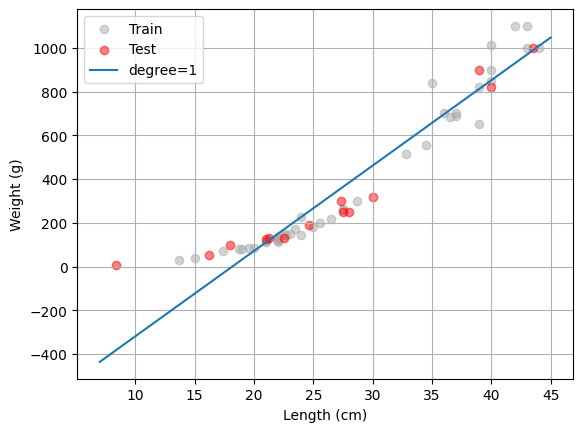

In [61]:
# ÌõàÎ†® ÏÖã ÏÇ∞Ï†êÎèÑ(Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='DarkGray')
# ÌÖåÏä§Ìä∏ ÏÖã ÏÇ∞Ï†êÎèÑ(Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='Red')
# ÏÑ†Ìòï ÌöåÍ∑Ä ÏßÅÏÑ† ÏÑ†Í∑∏ÎûòÌîÑ
x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)   # y = w0 + w1 * x
plt.plot(x_vals, y_vals, label='degree=1')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

## degree=2, 2Ï∞®Ìï≠

In [62]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [63]:
pipe.fit(X_train, y_train)  # training

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [64]:
pipe['reg'].coef_

array([-188.16429447,  532.30423546])

In [65]:
pipe['reg'].intercept_

np.float64(400.83333333333326)

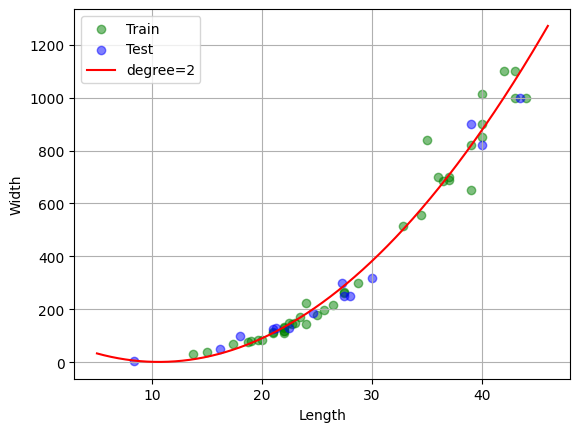

In [66]:
# ÌõàÎ†® ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='green')
# ÌÖåÏä§Ìä∏ ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='blue')
# ÏÑ†ÌòïÌöåÍ∑Ä 2Ï∞®Ìï≠ ÏÑ†Í∑∏ÎûòÌîÑ
x_value = np.arange(5, 46, 0.001).reshape((-1, 1))
y_value = pipe.predict(x_value)
plt.plot(x_value, y_value, label='degree=2', color='red')

plt.legend()
plt.grid()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## degree=5, 5Ï∞®Ìï≠

In [67]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [69]:
pipe['reg'].coef_

array([ 1090.51349849, -4377.12096334,  5960.80924384, -2038.47216236,
        -298.04297802])

In [70]:
pipe['reg'].intercept_

np.float64(400.8333333333347)

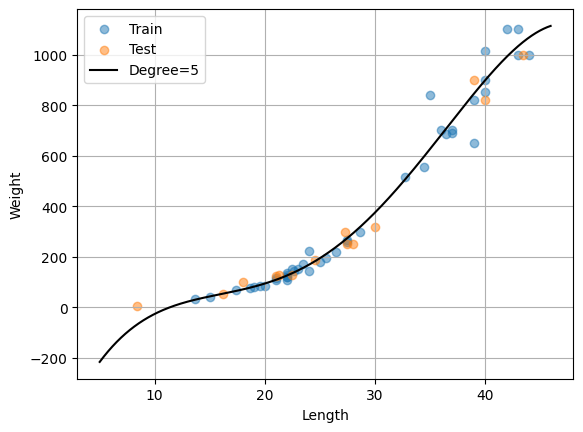

In [71]:
# ÌõàÎ†® ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# ÌÖåÏä§Ìä∏ ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# ÏÑ†ÌòïÌöåÍ∑Ä 5Ï∞®Ìï≠ ÏÑ†Í∑∏ÎûòÌîÑ
x_values = np.arange(5, 46, 0.001).reshape((-1, 1))
y_values = pipe.predict(x_values)
plt.plot(x_values, y_values, label='Degree=5', color='black')

plt.grid()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

## degree=50, 50Ï∞®Ìï≠

In [72]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [73]:
pipe.fit(X_train, y_train)      # training

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [74]:
pipe['reg'].coef_

array([-1.06655732e+10,  1.31607835e+11, -7.23161507e+11,  2.21914500e+12,
       -3.82903989e+12,  2.83355131e+12,  1.34283568e+12, -2.96056487e+12,
       -1.15588476e+12,  2.47206303e+12,  2.08521405e+12, -1.12369432e+12,
       -2.75528228e+12, -1.19478485e+12,  1.52303149e+12,  2.66920812e+12,
        1.41672749e+12, -9.47446537e+11, -2.50374325e+12, -2.21496901e+12,
       -4.41802170e+11,  1.56357602e+12,  2.57516018e+12,  2.08702650e+12,
        4.67713722e+11, -1.36681656e+12, -2.48471888e+12, -2.38414097e+12,
       -1.16743693e+12,  5.69154142e+11,  2.04400475e+12,  2.63025744e+12,
        2.09946051e+12,  6.87519539e+11, -1.02047640e+12, -2.32799351e+12,
       -2.69616960e+12, -1.95101562e+12, -3.62133469e+11,  1.44020668e+12,
        2.68424495e+12,  2.75434519e+12,  1.48200526e+12, -6.79292434e+11,
       -2.68516349e+12, -3.22616369e+12, -1.39723093e+12,  2.26817999e+12,
        4.41059579e+12, -2.84704294e+12])

In [75]:
pipe['reg'].intercept_

np.float64(400.8355034612611)

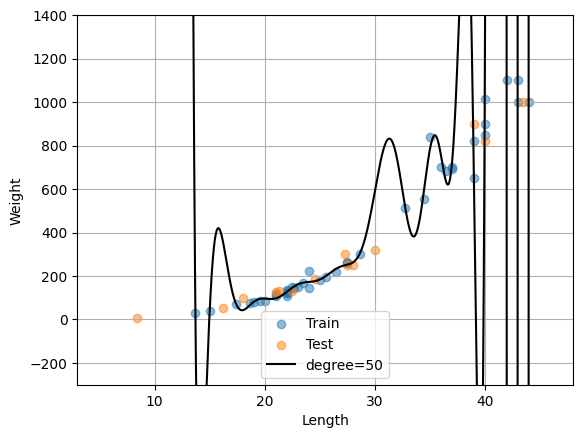

In [76]:
# ÌõàÎ†® ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# ÌÖåÏä§Ìä∏ ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# ÏÑ†ÌòïÌöåÍ∑Ä 50Ï∞®Ìï≠ ÏÑ†Í∑∏ÎûòÌîÑ
x_vals = np.arange(5, 46, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)
plt.plot(x_vals, y_vals, label='degree=50', color='black')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.ylim((-300, 1400))
plt.show()

----- degree = 1 -----
ÌõàÎ†® ÏÖã MSE = 7422.953552609778
ÌÖåÏä§Ìä∏ ÏÖã MSE = 17590.265977889165
----- degree = 2 -----
ÌõàÎ†® ÏÖã MSE = 3617.9917403639633
ÌÖåÏä§Ìä∏ ÏÖã MSE = 2248.9974694392554
----- degree = 5 -----
ÌõàÎ†® ÏÖã MSE = 3216.6113933040733
ÌÖåÏä§Ìä∏ ÏÖã MSE = 1753.0984158595472
----- degree = 50 -----
ÌõàÎ†® ÏÖã MSE = 1242.3671485244474
ÌÖåÏä§Ìä∏ ÏÖã MSE = 7683897194550.778


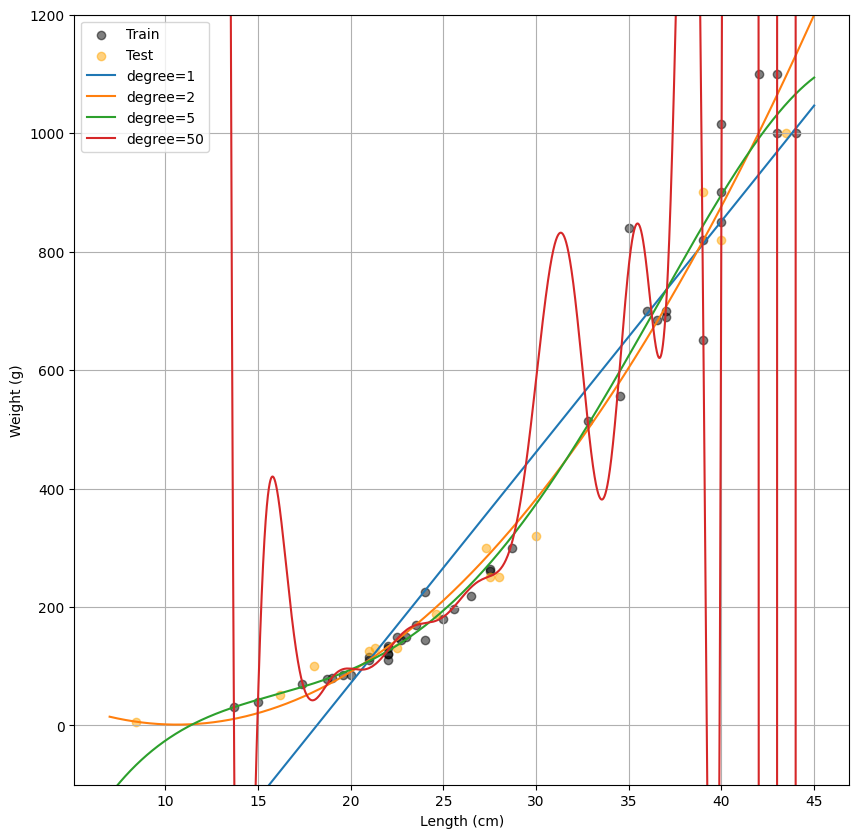

In [77]:
plt.figure(figsize=(10, 10))

# ÌõàÎ†® ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='black')

# ÌÖåÏä§Ìä∏ ÏÖã ÏÇ∞Ï†êÎèÑ (Î¨¥Í≤å ~ Í∏∏Ïù¥)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='orange')

# PolynomialFeaturesÏóêÏÑú ÏÇ¨Ïö©Ìï† degree(Ï∞®Ïàò) Í∞íÎì§
degrees = (1, 2, 5, 50)
for d in degrees:
    # Pipeline Í∞ùÏ≤¥ ÏÉùÏÑ±
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                           ('scaler', StandardScaler()),
                           ('reg', LinearRegression())])
    # ÌõàÎ†® ÏÖãÏúºÎ°ú ML Î™®Îç∏ ÌõàÎ†®
    pipe.fit(X_train, y_train)

    # ÌõàÎ†® ÏÖã/ÌÖåÏä§Ìä∏ ÏÖã MSE Ï∂úÎ†•
    print(f'----- degree = {d} -----')
    train_pred = pipe.predict(X_train)
    print('ÌõàÎ†® ÏÖã MSE =', mean_squared_error(y_train, train_pred))
    test_pred = pipe.predict(X_test)
    print('ÌÖåÏä§Ìä∏ ÏÖã MSE =', mean_squared_error(y_test, test_pred))

    # ÌöåÍ∑Ä ÏãùÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ÏÑú
    x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))   # ÌöåÍ∑ÄÏãù ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú xÏ¢åÌëúÎì§
    y_vals = pipe.predict(x_vals)   # ÌöåÍ∑ÄÏãù ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú y Ï¢åÌëúÎì§
    plt.plot(x_vals, y_vals, label=f'degree={d}')   # ÏÑ†Í∑∏ÎûòÌîÑ


plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.ylim((-100, 1200))  # yÏ∂ïÏùÑ Í∑∏Î¶¥ Î≤îÏúÑ
plt.show()

# Í∑úÏ†ú(Regularization)


*   Î®∏Ïã† Îü¨ÎãùÏùò Î™©Ï†ÅÏùÄ ÎπÑÏö© Ìï®Ïàò(cost function)/ÏÜêÏã§ Ìï®Ïàò(loss function)ÏùÑ ÏµúÏÜåÌôîÌïòÎäî Í≤É.


*   ÏÑ†Ìòï ÌöåÍ∑Ä(linear regression)Ïùò Î™©Ï†ÅÏùÄ MSE(mean_squared_error)Î•º ÏµúÏÜåÎ°ú ÎßåÎìúÎäî Í≥ÑÏàòÎì§($w_0, ..., w_m$)ÏùÑ Ï∞æÎäî Í≤É. Ï¶â, ÏÑ†Ìòï ÌöåÍ∑ÄÏùò ÎπÑÏö© Ìï®ÏàòÎäî MSE(w).
$$
J(w) = MSE(w)
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2
$$
    *   $N$: ÏÉòÌîåÏùò Í∞úÏàò(DataFrameÏùò rowÏùò Í∞úÏàò)
    *   $m$: ÌäπÏÑ±Ïùò Í∞úÏàò(DataFrameÏùò columnÏùò Í∞úÏàò)
    *   $y_i$: $i$Î≤àÏß∏ ÏÉòÌîåÏùò Ïã§Ï†ØÍ∞í
    *   $\hat{y_i}$: $i$Î≤àÏß∏ ÏÉòÌîåÏùò ÏòàÏ∏°Í∞í
    *   $x_{ij}$: $i$Î≤àÏß∏ ÏÉòÌîåÏùò $j$Î≤àÏß∏ ÌäπÏÑ± Í∞í
    *   $w_j$: $j$Î≤àÏß∏ ÌäπÏÑ±Ïóê Í≥±Ìï¥Ï£ºÎäî Í≥ÑÏàò(Í∏∞Ïö∏Í∏∞)

*   Ridge(`l2`) Í∑úÏ†úÏùò Î™©Ï†ÅÏùÄ ÏïÑÎûòÏùò ÎπÑÏö© Ìï®ÏàòÎ•º ÏµúÏÜåÎ°ú ÎßåÎìúÎäî Í≥ÑÏàòÎì§($w_0, ..., w_m$)ÏùÑ Ï∞æÎäî Í≤É.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge Í∑úÏ†úÏùò Ìö®Í≥ºÎäî Í≥†Ï∞®Ìï≠Îì§Ïùò Í≥ÑÏàò(coefficients, Í∏∞Ïö∏Í∏∞)Î•º ÏûëÍ≤å ÎßåÎì§Ïñ¥ÏÑú Í≥°ÏÑ†Ïùò Í∏∞Ïö∏Í∏∞Î•º ÏôÑÎßåÌïòÍ≤å ÎßåÎì§Ïñ¥ Ï£ºÍ≤å Îê®. overfitting(Í≥ºÎåÄÏ†ÅÌï©)ÏùÑ Ï§ÑÏó¨Ï£ºÍ≤å Îê®.

*   Lasso(`l1`) Í∑úÏ†úÏùò Î™©Ï†ÅÏùÄ ÏïÑÎûòÏùò ÎπÑÏö© Ìï®ÏàòÎ•º ÏµúÏÜåÎ°ú ÎßåÎìúÎäî Í≥ÑÏàòÎì§($w_0, ..., w_m$)ÏùÑ Ï∞æÎäî Í≤É.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso Í∑úÏ†úÎäî Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ Í≥†Ï∞®Ìï≠Îì§Ïùò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Ï§åÏúºÎ°úÏç®, Í≥°ÏÑ†ÏùÑ ÏôÑÎßåÌïòÍ≤å ÎßåÎì§Ïñ¥ Ï£ºÎäî Ìö®Í≥ºÍ∞Ä ÏÉùÍπÄ. Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Ï§ÑÏó¨Ï£ºÎäî Ìö®Í≥º.

*   ElasticNet Í∑úÏ†úÏùò Î™©Ï†ÅÏùÄ ÏïÑÎûòÏùò ÎπÑÏö© Ìï®ÏàòÎ•º ÏµúÏÜåÎ°ú ÎßåÎìúÎäî Í≥ÑÏàòÎì§($w_0, ..., w_m$)ÏùÑ Ï∞æÎäî Í≤É.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNetÏùÄ Ridge Í∑úÏ†úÏôÄ Lasso Í∑úÏ†úÏùò Ìö®Í≥ºÎ•º Î™®Îëê Í∞ÄÏßÄÍ≥† ÏûàÏùå.

*   Ridge, LassoÏóêÏÑú $\alpha$ Í∞íÏù¥ ÌÅ¨Î©¥ Í∑úÏ†úÍ∞Ä Í∞ïÌï¥ÏßÄÍ≥†, $\alpha$ Í∞íÏù¥ ÏûëÏúºÎ©¥ Í∑úÏ†úÍ∞Ä ÏïΩÌï¥Ïßê($ \alpha \ge 0 $).
*   ElasticNetÏóêÏÑú $\alpha$Îäî Í∑úÏ†úÏùò ÌÅ¨Í∏∞Î•º ÏùòÎØ∏ÌïòÍ≥†, $r$ÏùÄ `l1` Í∑úÏ†úÏùò ÎπÑÏú®($0 \le r \le 1$)ÏùÑ ÏùòÎØ∏Ìï®.

## L2 Í∑úÏ†ú(Ridge)

In [78]:
def visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator):
    plt.figure(figsize=(10, 10))

    plt.scatter(X_train, y_train, color='black', alpha=0.5, label='Train')
    plt.scatter(X_test, y_test, color='orange', alpha=0.5, label='Test')

    for d in degrees:
        pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('reg', estimator)])
        pipe.fit(X_train, y_train)
        train_pred = pipe.predict(X_train)
        test_pred = pipe.predict(X_test)
        print(f'degree={d}: {r2_score(y_train, train_pred)}(Train) / {r2_score(y_test,test_pred)}(Test)')
        x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
        y_vals = pipe.predict(x_vals)
        plt.plot(x_vals, y_vals, label=f'degree={d}')

    plt.grid()
    plt.legend()
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.ylim((-100, 1200))
    plt.show()

degree=1: 0.9393380341955502(Train) / 0.836127969609232(Test)
degree=2: 0.9619389326333372(Train) / 0.9347719209841489(Test)
degree=5: 0.9675257933461249(Train) / 0.9665833996552663(Test)
degree=50: 0.9739229136053733(Train) / 0.9813385255457557(Test)


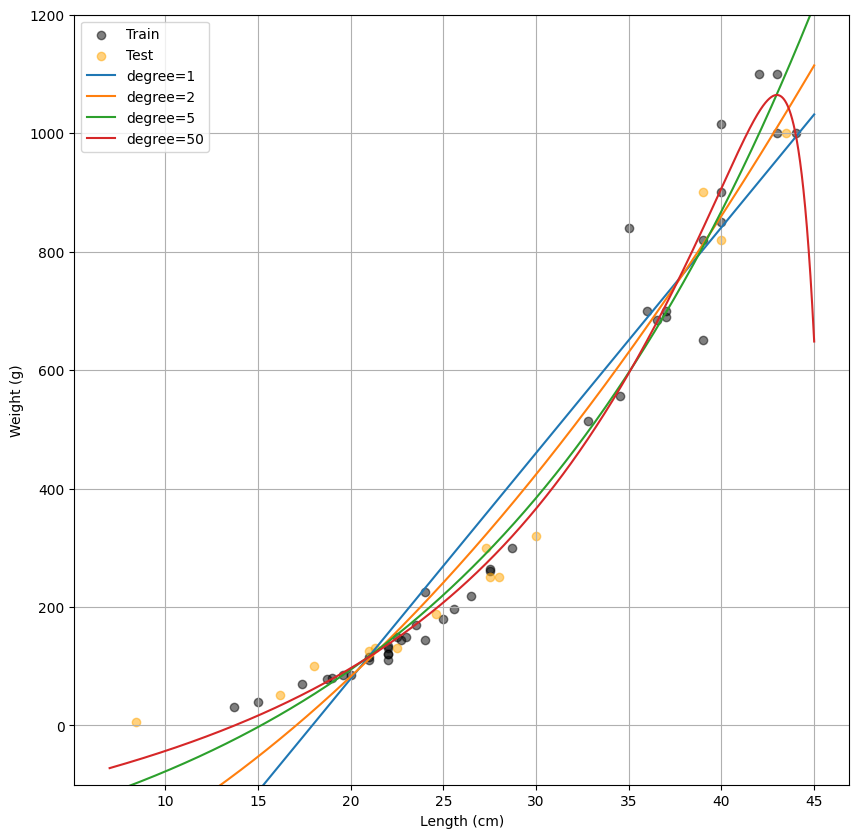

In [79]:
degrees = (1, 2, 5, 50)
estimator = Ridge()     # ÎπÑÏö© Ìï®ÏàòÏóê ÏùºÎ∂ÄÎü¨ ErrorÎ•º Îçî Ï§òÏÑú ÌõàÎ†®ÏÑ∏Ìä∏Î•º Îçú Î™ª ÎßûÌûàÍ≤å ÎßåÎì¶.
visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator)

## L1 Í∑úÏ†ú(Lasso)

degree=1: 0.9398382302602472(Train) / 0.8262705448946932(Test)
degree=2: 0.9682046094058255(Train) / 0.9632610688126504(Test)
degree=5: 0.9692636157789123(Train) / 0.9718691066691287(Test)
degree=50: 0.9747331384703934(Train) / 0.9827585864116039(Test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.007e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


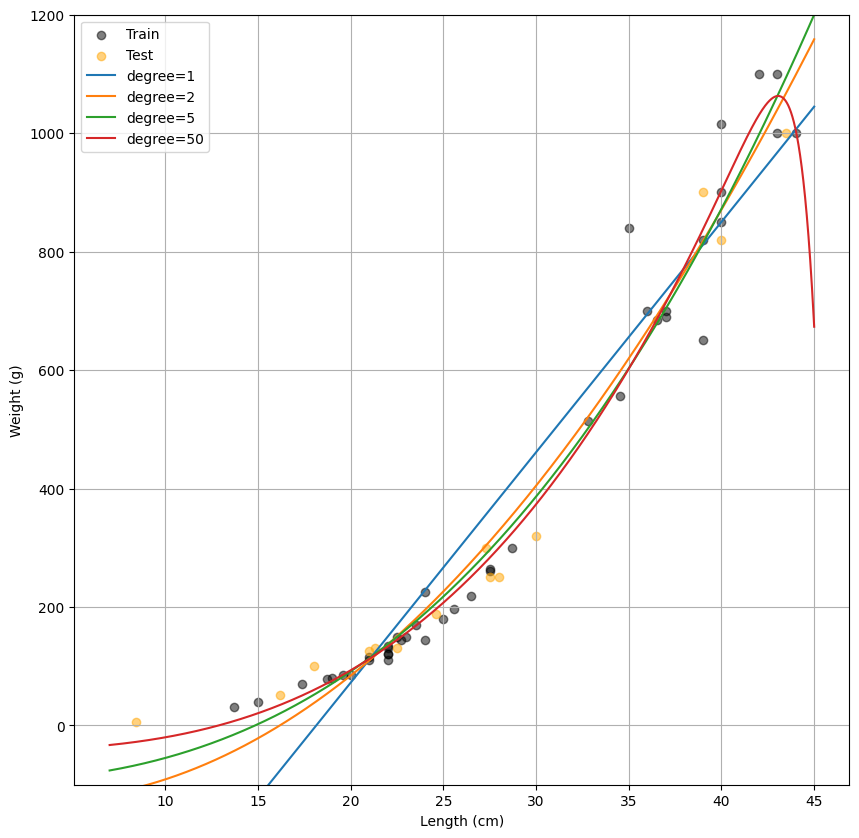

In [80]:
estimator = Lasso()
visualize_regression(X_train, y_train, X_test, y_test, degrees, estimator)

## ElasticNet

degree=1: 0.8348047834365431(Train) / 0.8425462812915511(Test)
degree=2: 0.9179731022680415(Train) / 0.9211902563521128(Test)
degree=5: 0.9574099753809557(Train) / 0.9741613969257316(Test)
degree=50: 0.9610659368865341(Train) / 0.9817137006795826(Test)


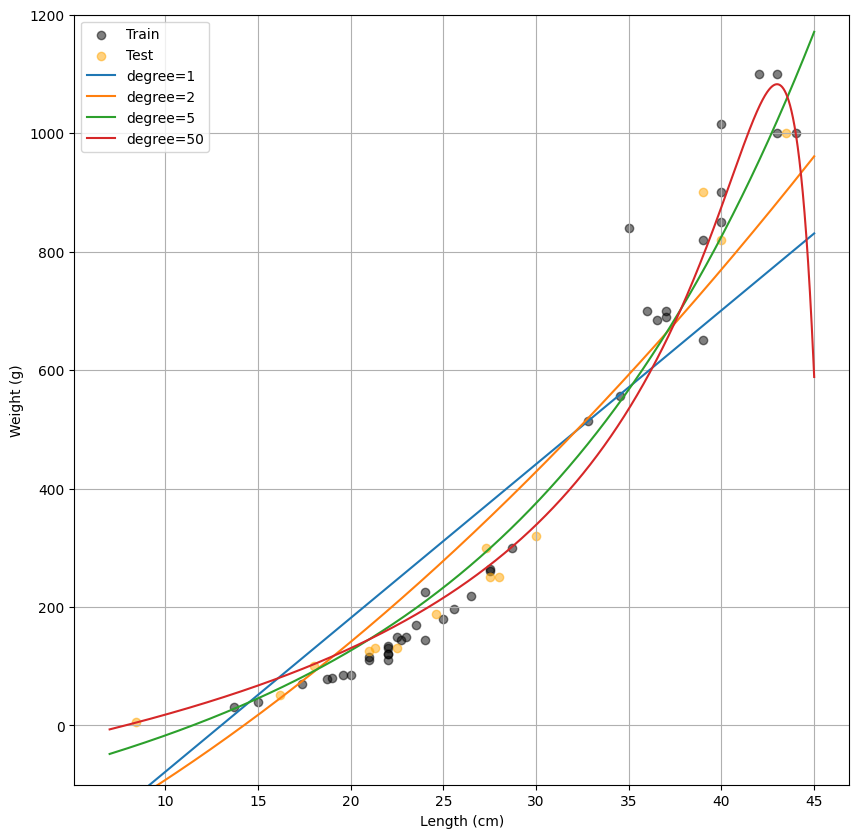

In [81]:
visualize_regression(X_train, y_train, X_test, y_test, degrees, ElasticNet())   # ÎêòÎèÑÎ°ù Í≥ºÏÜåÏ†ÅÌï©ÏùÄ ÌîºÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå.

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(Hyper-parameter) ÌäúÎãù

* Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞(model parameter) : Î®∏Ïã† Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ ÏàòÌïôÏ†ÅÏù∏ Î™®Îç∏Ïùò ÎπÑÏö©Ìï®ÏàòÎ•º ÏµúÏÜåÌôîÌïòÎèÑÎ°ù ÎßåÎìúÎäî ÌååÎùºÎØ∏ÌÑ∞Îì§. Î®∏Ïã† Îü¨ÎãùÏóêÏÑú Ïä§Ïä§Î°ú Ï∞æÏïÑÎÇ¥Îäî Í∞íÎì§.
* ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(hyper-parameter) : Î®∏Ïã† Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑú Í∞úÎ∞úÏûêÍ∞Ä Î∞îÍøîÍ∞ÄÎ©¥ÏÑú ÌÖåÏä§Ìä∏ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Îì§.
    * PolynomialFeaturesÏùò degree
    * Í∑úÏ†ú(L2, L1, ElasticNet)ÏóêÏÑú alpha
    * KNN ÏïåÍ≥†Î¶¨Ï¶ò k

# Í∑úÏ†ú ÌÅ¨Í∏∞(alpha)Ïóê Îî∞Î•∏ Í≤∞Ï†ïÍ≥ÑÏàò(R2 score) Î≥ÄÌôî

* ÌäπÏÑ± : Length, Diagonal, Height, Width, Î†àÏù¥Î∏î : Weight
* Ridge, degree=5, StandardScaler, alpha=(0.001, 0.01, 0.1, 1.0, 10, 100), ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÏÖã R2 score Í≥ÑÏÇ∞
* Lasso, ""
* ElasticNet, ""

In [82]:
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values

In [83]:
y = perch['Weight'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Ridge

In [94]:
degree = 5
estimator = Ridge
alpha = (0.001, 0.01, 0.1, 1.0, 10, 100)

In [95]:
def Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator):
    # train_score = []
    # test_score = []
    # for a in alpha:
    #     pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    #                            ('scaler', StandardScaler()),
    #                            ('reg', estimator(alpha=a))])
    #     pipe.fit(X_train, y_train)  # training
    #     train_pred = pipe.predict(X_train)
    #     test_pred = pipe.predict(X_test)
    #     print(f'---{a}--- {r2_score(y_train, train_pred)}(Train) / {r2_score(y_test, test_pred)}(Test)')
    #     train_score.append(pipe.score(X_train, y_train))
    #     test_score.append(pipe.score(X_test, y_test))

        plt.plot(alpha, train_score, label=f'{a}')      # ÏïàÏ™ΩÏù¥ ÏïÑÎãàÎùº Î∞îÍπ•ÏóêÏÑú Ïã§Ìñâ!!
        # plt.plot(a, test_score, label=f'{a}')
        # plt.plot(x_vals, y_vals, label=f'{a}')

    # plt.grid()
    # plt.legend()
    # plt.ylim((-10, 10))
    # plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

def Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator):
    alpha = [0.001, 0.01, 0.1, 1.0, 10, 100]
    train_score = []
    test_score = []

    for a in alpha:
        pipe = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('reg', estimator(alpha=a))
        ])
        pipe.fit(X_train, y_train)

        train_pred = pipe.predict(X_train)
        test_pred = pipe.predict(X_test)

        r2_train = r2_score(y_train, train_pred)
        r2_test = r2_score(y_test, test_pred)

        print(f'--- Œ±={a} --- R¬≤(Train): {r2_train:.4f} / R¬≤(Test): {r2_test:.4f}')

        train_score.append(r2_train)
        test_score.append(r2_test)

    # üìä ÏãúÍ∞ÅÌôî (Î£®ÌîÑ Î∞îÍπ•ÏóêÏÑú Ìïú Î≤àÎßå Ïã§Ìñâ!)
    plt.figure(figsize=(8, 5))
    plt.plot(alpha, train_score, marker='o', label='Train R¬≤')
    plt.plot(alpha, test_score, marker='v', label='Test R¬≤')
    plt.xscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùºÏù¥ alpha ÎπÑÍµêÏóê Ï†ÅÌï©
    plt.xlabel('Alpha')
    plt.ylabel('R¬≤ Score')
    plt.title(f'Ridge Regression R¬≤ vs Alpha (degree={degree})')
    plt.grid(True)
    plt.legend()
    # plt.ylim(-1, 1)
    plt.show()


--- Œ±=0.001 --- R¬≤(Train): 0.9947 / R¬≤(Test): 0.8806
--- Œ±=0.01 --- R¬≤(Train): 0.9927 / R¬≤(Test): 0.9676
--- Œ±=0.1 --- R¬≤(Train): 0.9907 / R¬≤(Test): 0.9830
--- Œ±=1.0 --- R¬≤(Train): 0.9899 / R¬≤(Test): 0.9806
--- Œ±=10 --- R¬≤(Train): 0.9891 / R¬≤(Test): 0.9749
--- Œ±=100 --- R¬≤(Train): 0.9847 / R¬≤(Test): 0.9620


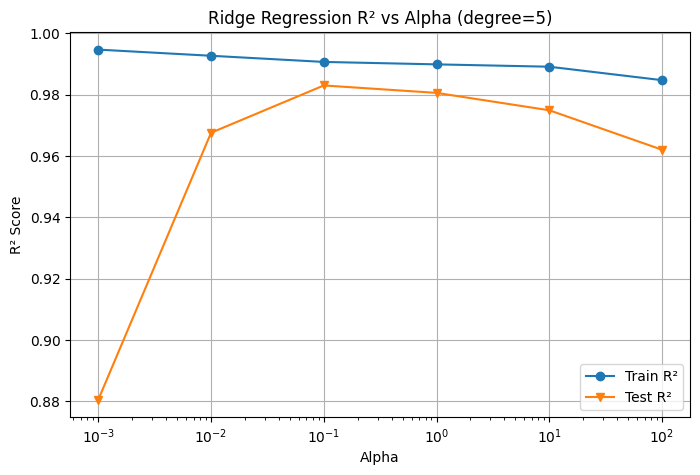

In [89]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

## Lasso

In [90]:
estimator = Lasso

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.183e

--- Œ±=0.001 --- R¬≤(Train): 0.9913 / R¬≤(Test): 0.9825
--- Œ±=0.01 --- R¬≤(Train): 0.9912 / R¬≤(Test): 0.9828
--- Œ±=0.1 --- R¬≤(Train): 0.9902 / R¬≤(Test): 0.9822
--- Œ±=1.0 --- R¬≤(Train): 0.9898 / R¬≤(Test): 0.9801
--- Œ±=10 --- R¬≤(Train): 0.9888 / R¬≤(Test): 0.9825
--- Œ±=100 --- R¬≤(Train): 0.9079 / R¬≤(Test): 0.9093


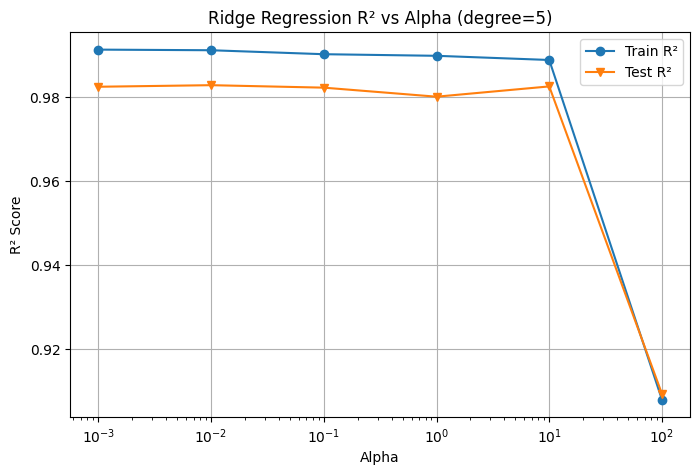

In [91]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

## ElasticNet

In [92]:
estimator = ElasticNet

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 5.183e

--- Œ±=0.001 --- R¬≤(Train): 0.9912 / R¬≤(Test): 0.9829
--- Œ±=0.01 --- R¬≤(Train): 0.9903 / R¬≤(Test): 0.9826
--- Œ±=0.1 --- R¬≤(Train): 0.9897 / R¬≤(Test): 0.9793
--- Œ±=1.0 --- R¬≤(Train): 0.9884 / R¬≤(Test): 0.9720
--- Œ±=10 --- R¬≤(Train): 0.9807 / R¬≤(Test): 0.9616
--- Œ±=100 --- R¬≤(Train): 0.8298 / R¬≤(Test): 0.8422


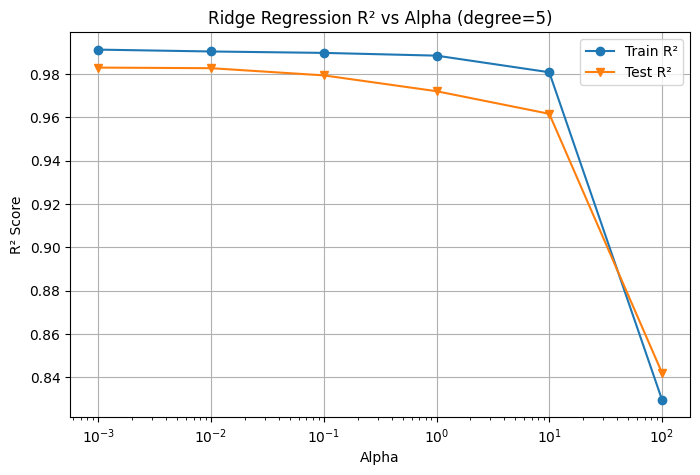

In [93]:
Ridge_r2(X_train, X_test, y_train, y_test, degree, estimator)

In [101]:
X = perch[perch.columns[2:]].values
y = perch['Weight'].values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
def visualize_r2_score(X_tr, y_tr, X_te, y_te, estimator, alphas):
    train_scores = []   # Í∑úÏ†ú ÌÅ¨Í∏∞(alpha)Ïóê Îî∞Î•∏ ÌõàÎ†® ÏÖãÏùò Í≤∞Ï†ï Í≥ÑÏàòÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
    test_scores = []    # Í∑úÏ†ú ÌÅ¨Í∏∞(alpha)Ïóê Îî∞Î•∏ ÌÖåÏä§Ìä∏ ÏÖãÏùò Í≤∞Ï†ï Í≥ÑÏàòÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
    for a in alphas:
        if estimator == 'l1':
            reg = Lasso(alpha=a)
        elif estimator == 'l2':
            reg = Ridge(alpha=a)
        elif estimator == 'elastic':
            reg = ElasticNet(alpha=a)
        else:
            raise ValueError('estimatorÎäî "l1", "l2", ÎòêÎäî "elastic"Ïù¥Ïñ¥Ïïº Ìï®.')

        pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('reg', reg)])

        pipe.fit(X_tr, y_tr)

        train_r2 = pipe.score(X_tr, y_tr)
        train_scores.append(train_r2)                   # train_scoresÏôÄ test_scresÏóê Í∞íÏùÑ Í≥ÑÏÜç Ï†ÄÏû•Ìï®
        test_r2 = pipe.score(X_te, y_te)                # Ïó¨Í∏∞ÏóêÎäî alphasÏùò Í∞í Ï¶â 0.001, 0.01, 0.1, 1.0, 10, 100Ïùò Í∞íÎì§Ïù¥ Ï†ÑÎ∂Ä Ìè¨Ìï®Îê®.
        test_scores.append(test_r2)

        print(f'alpha={a}: train({train_r2:.3f}) / est({test_r2:.3f})')

    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train $r^2$')    # xÏùò Í∞ÑÍ≤©Ïù¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÏïÑÏÑú logÎ•º ÏÇ¨Ïö©Ìï¥ Í∞ÑÍ≤©ÏùÑ ÏùºÏ†ïÌïòÍ≤å ÎßåÎì¶.
    plt.plot(np.log10(alphas), test_scores, 'r^:', label='test $r^2$')      # 1 : nÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏïÑÎãàÎùº 1:1Î°ú Îß§ÌïëÎê®.
    plt.legend()
    plt.grid()
    plt.xlabel('alpha (log scale)')
    plt.ylabel('$r^2$ score')
    plt.show()

alpha=0.001: train(0.995) / est(0.881)
alpha=0.01: train(0.993) / est(0.968)
alpha=0.1: train(0.991) / est(0.983)
alpha=1: train(0.990) / est(0.981)
alpha=10: train(0.989) / est(0.975)
alpha=100: train(0.985) / est(0.962)


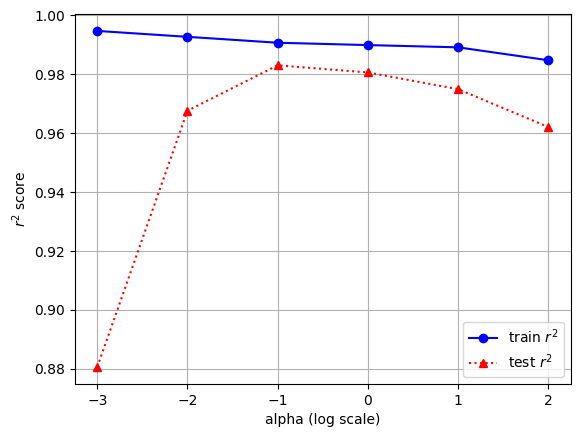

In [116]:
# Ridge
# alphas = (0.001, 0.01, 0.1, 1.0, 10, 100)
alphas = [10 ** x for x in range(-3, 3)]
visualize_r2_score(X_train, y_train, X_test, y_test, 'l2', alphas)

alpha=0.001: train(0.991) / est(0.982)
alpha=0.01: train(0.991) / est(0.983)
alpha=0.1: train(0.990) / est(0.982)
alpha=1: train(0.990) / est(0.980)
alpha=10: train(0.989) / est(0.983)
alpha=100: train(0.908) / est(0.909)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.183e

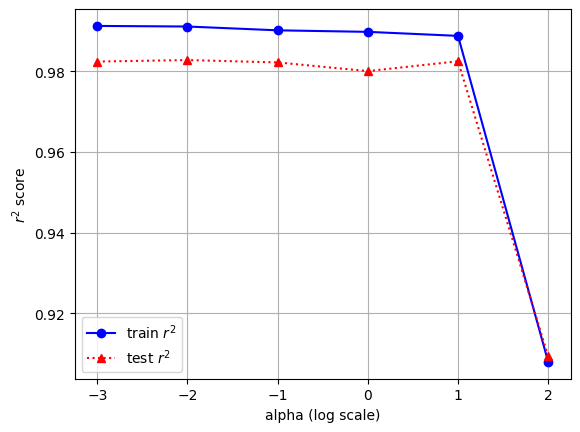

In [117]:
# Lasso
visualize_r2_score(X_train, y_train, X_test, y_test, 'l1', alphas)   # Í≥ºÎåÄÏ†ÅÌï©

alpha=0.001: train(0.991) / est(0.983)
alpha=0.01: train(0.990) / est(0.983)
alpha=0.1: train(0.990) / est(0.979)
alpha=1: train(0.988) / est(0.972)
alpha=10: train(0.981) / est(0.962)
alpha=100: train(0.830) / est(0.842)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+04, tolerance: 5.183e

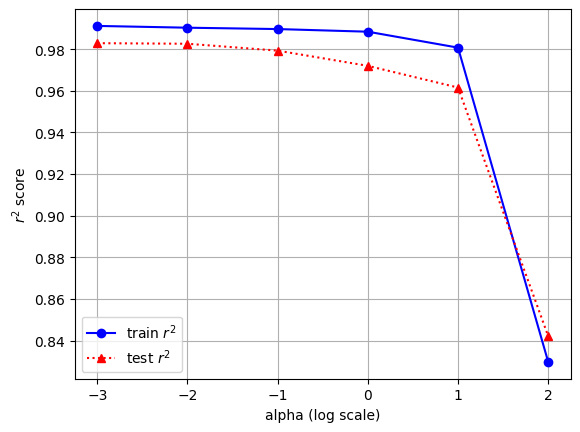

In [118]:
# ElasticNet
visualize_r2_score(X_train, y_train, X_test, y_test, 'elastic', alphas)